In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
import matplotlib
import datetime as dt
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from keras.layers import Flatten
from keras.layers import LSTM
from keras.layers.convolutional import Conv1D
from tensorflow import keras
from keras.layers.convolutional import MaxPooling1D
from keras import optimizers
from matplotlib import pyplot
from keras.layers import Dropout
import tensorflow as tf
# lstm autoencoder recreate sequence
from numpy import array
from keras.models import Sequential
from keras.models import Model
from keras.layers import Dense
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
from keras.layers import LeakyReLU
from keras.utils import plot_model
from keras.models import Model
from keras.layers import Input
from keras.layers import concatenate
from keras.layers import Dense
from keras.layers.normalization import BatchNormalization
from pandas.tseries.offsets import *

jan_to_jun_2009 = pd.read_csv("../input/thesis/jan_to_jun_2009.csv",index_col=0,usecols=['TR_DATE','VALUE (in Rs)','foreign-exchange','RFDE_INSTR_TYPE','Inflation-Rate','FDI-Inward','FDI-Growth-Rate','GDP-Growth-Rate','IIP','unemployment-rate','BSE_Close','twitter-sentiment','Real-GDP'])
jul_to_dec_2009 = pd.read_csv("../input/thesis/jul_to_dec_2009.csv",index_col=0,usecols=['TR_DATE','VALUE (in Rs)','foreign-exchange','RFDE_INSTR_TYPE','Inflation-Rate','FDI-Inward','FDI-Growth-Rate','GDP-Growth-Rate','IIP','unemployment-rate','BSE_Close','twitter-sentiment','Real-GDP'])
jan_to_jun_2010 = pd.read_csv("../input/thesis/jan_to_aug_2010.csv",index_col=0,usecols=['TR_DATE','VALUE (in Rs)','foreign-exchange','RFDE_INSTR_TYPE','Inflation-Rate','FDI-Inward','FDI-Growth-Rate','GDP-Growth-Rate','IIP','unemployment-rate','BSE_Close','twitter-sentiment','Real-GDP'])
jul_to_dec_2010 = pd.read_csv("../input/thesis/sep_to_dec_2010.csv",index_col=0,usecols=['TR_DATE','VALUE (in Rs)','foreign-exchange','RFDE_INSTR_TYPE','Inflation-Rate','FDI-Inward','FDI-Growth-Rate','GDP-Growth-Rate','IIP','unemployment-rate','BSE_Close','twitter-sentiment','Real-GDP'])
jan_to_jun_2011 = pd.read_csv("../input/thesis/jan_to_jun_2011.csv",index_col=0,usecols=['TR_DATE','VALUE (in Rs)','foreign-exchange','RFDE_INSTR_TYPE','Inflation-Rate','FDI-Inward','FDI-Growth-Rate','GDP-Growth-Rate','IIP','unemployment-rate','BSE_Close','twitter-sentiment','Real-GDP'])
jul_to_dec_2011 = pd.read_csv("../input/thesis/jul_to_dec_2011.csv",index_col=0,usecols=['TR_DATE','VALUE (in Rs)','foreign-exchange','RFDE_INSTR_TYPE','Inflation-Rate','FDI-Inward','FDI-Growth-Rate','GDP-Growth-Rate','IIP','unemployment-rate','BSE_Close','twitter-sentiment','Real-GDP'])
jan_to_jun_2012 = pd.read_csv("../input/thesis/jan_to_jun_2012.csv",index_col=0,usecols=['TR_DATE','VALUE (in Rs)','foreign-exchange','RFDE_INSTR_TYPE','Inflation-Rate','FDI-Inward','FDI-Growth-Rate','GDP-Growth-Rate','IIP','unemployment-rate','BSE_Close','twitter-sentiment','Real-GDP']) 
jul_to_dec_2012 = pd.read_csv("../input/thesis/jul_to_dec_2012.csv",index_col=0,usecols=['TR_DATE','VALUE (in Rs)','foreign-exchange','RFDE_INSTR_TYPE','Inflation-Rate','FDI-Inward','FDI-Growth-Rate','GDP-Growth-Rate','IIP','unemployment-rate','BSE_Close','twitter-sentiment','Real-GDP'])
jan_to_jun_2013 = pd.read_csv("../input/thesis/jan_to_jun_2013.csv",index_col=0,usecols=['TR_DATE','VALUE (in Rs)','foreign-exchange','RFDE_INSTR_TYPE','Inflation-Rate','FDI-Inward','FDI-Growth-Rate','GDP-Growth-Rate','IIP','unemployment-rate','BSE_Close','twitter-sentiment','Real-GDP'])
jul_to_dec_2013 = pd.read_csv("../input/thesis/jul_to_dec_2013.csv",index_col=0,usecols=['TR_DATE','VALUE (in Rs)','foreign-exchange','RFDE_INSTR_TYPE','Inflation-Rate','FDI-Inward','FDI-Growth-Rate','GDP-Growth-Rate','IIP','unemployment-rate','BSE_Close','twitter-sentiment','Real-GDP'])
jan_to_jun_2014 = pd.read_csv("../input/thesis/jan_to_jun_2014.csv",index_col=0,usecols=['TR_DATE','VALUE (in Rs)','foreign-exchange','RFDE_INSTR_TYPE','Inflation-Rate','FDI-Inward','FDI-Growth-Rate','GDP-Growth-Rate','IIP','unemployment-rate','BSE_Close','twitter-sentiment','Real-GDP'])
jul_to_dec_2014 = pd.read_csv("../input/thesis/jul_to_dec_2014.csv",index_col=0,usecols=['TR_DATE','VALUE (in Rs)','foreign-exchange','RFDE_INSTR_TYPE','Inflation-Rate','FDI-Inward','FDI-Growth-Rate','GDP-Growth-Rate','IIP','unemployment-rate','BSE_Close','twitter-sentiment','Real-GDP'])
jan_to_jun_2015 = pd.read_csv("../input/thesis/jan_to_jun_2015.csv",index_col=0,usecols=['TR_DATE','VALUE (in Rs)','foreign-exchange','RFDE_INSTR_TYPE','Inflation-Rate','FDI-Inward','FDI-Growth-Rate','GDP-Growth-Rate','IIP','unemployment-rate','BSE_Close','twitter-sentiment','Real-GDP'])
jul_to_dec_2015 = pd.read_csv("../input/thesis/jul_to_dec_2015.csv",index_col=0,usecols=['TR_DATE','VALUE (in Rs)','foreign-exchange','RFDE_INSTR_TYPE','Inflation-Rate','FDI-Inward','FDI-Growth-Rate','GDP-Growth-Rate','IIP','unemployment-rate','BSE_Close','twitter-sentiment','Real-GDP'])
jan_to_jun_2016 = pd.read_csv("../input/thesis/jan_to_jun_2016.csv",index_col=0,usecols=['TR_DATE','VALUE (in Rs)','foreign-exchange','RFDE_INSTR_TYPE','Inflation-Rate','FDI-Inward','FDI-Growth-Rate','GDP-Growth-Rate','IIP','unemployment-rate','BSE_Close','twitter-sentiment','Real-GDP'])
jul_to_dec_2016 = pd.read_csv("../input/thesis/jul_to_dec_2016.csv",index_col=0,usecols=['TR_DATE','VALUE (in Rs)','foreign-exchange','RFDE_INSTR_TYPE','Inflation-Rate','FDI-Inward','FDI-Growth-Rate','GDP-Growth-Rate','IIP','unemployment-rate','BSE_Close','twitter-sentiment','Real-GDP'])
jan_to_jun_2017 = pd.read_csv("../input/thesis/jan_to_jun_2017.csv",index_col=0,usecols=['TR_DATE','VALUE (in Rs)','foreign-exchange','RFDE_INSTR_TYPE','Inflation-Rate','FDI-Inward','FDI-Growth-Rate','GDP-Growth-Rate','IIP','unemployment-rate','BSE_Close','twitter-sentiment','Real-GDP'])
jul_to_dec_2017 = pd.read_csv("../input/thesis/jul_to_dec_2017.csv",index_col=0,usecols=['TR_DATE','VALUE (in Rs)','foreign-exchange','RFDE_INSTR_TYPE','Inflation-Rate','FDI-Inward','FDI-Growth-Rate','GDP-Growth-Rate','IIP','unemployment-rate','BSE_Close','twitter-sentiment','Real-GDP'])
jan_to_jul_2018 = pd.read_csv("../input/thesis/jan_to_jul_2018.csv",index_col=0,usecols=['TR_DATE','VALUE (in Rs)','foreign-exchange','RFDE_INSTR_TYPE','Inflation-Rate','FDI-Inward','FDI-Growth-Rate','GDP-Growth-Rate','IIP','unemployment-rate','BSE_Close','twitter-sentiment','Real-GDP'])



#ALL Files are concatenated together 

df = pd.concat([jan_to_jun_2009,jul_to_dec_2009,jan_to_jun_2010,jul_to_dec_2010,jan_to_jun_2011,jul_to_dec_2011,jan_to_jun_2012,jul_to_dec_2012,jan_to_jun_2013,jul_to_dec_2013,jan_to_jun_2014,jul_to_dec_2014,jan_to_jun_2015,jul_to_dec_2015,jan_to_jun_2016,jul_to_dec_2016,jan_to_jun_2017,jul_to_dec_2017,jan_to_jul_2018])


#Instrument type Equity is selected.

df = df.loc[df['RFDE_INSTR_TYPE'] == 'REG_DL_INSTR_EQ']

df =df.reset_index()
#Renaming of the column 

df = df.rename(columns={'VALUE (in Rs)': 'Sale'})

#Converting the TR_DATE columns which denotes the transaction date into date time formate. 

df['TR_DATE'] = df['TR_DATE'].astype('datetime64[D]')

def DataFrameCreation(df):
    
    df1 = pd.DataFrame()
    df2 = pd.DataFrame()
    df1['Date'] = df['TR_DATE'].values
    df1['Sale'] = df['Sale'].values
    df2['Date'] = df['TR_DATE'].values
    df2['Inflation-Rate'] = df['Inflation-Rate'].values
    df2['BSE_Close'] = df['BSE_Close'].values
    df2['FDI-Inward'] = df['FDI-Inward'].values
    df2['IIP'] = df['IIP'].values
    df2['unemployment-rate'] = df['unemployment-rate'].values
    df2['forex'] = df['foreign-exchange'].values
    df2['GDP-Growth'] = df['GDP-Growth-Rate'].values
    df2['FDI-Growth'] = df['FDI-Growth-Rate'].values
    df2['twitter'] = df['twitter-sentiment'].values
    df2['Real-GDP'] = df['Real-GDP'].values


#Data is day wise distributed. Thus summing together to get the total sum of Equity instrument sold per day 

    df1 = df1.groupby(['Date']).sum()

    df1 = df1.reset_index(level='Date')

#Getting the exact value of different macro-economic variables per day. 

    df2 = df2.groupby(['Date'], as_index=False).mean()


#Formulating the dataset with columns Date, Sale, and macro-economic variables. 

    df1['BSE_Close'] = df1['Date'].map(df2.set_index('Date')['BSE_Close'])
    df1['FDI-Inward'] = df1['Date'].map(df2.set_index('Date')['FDI-Inward'])
    
    df1['IIP'] = df1['Date'].map(df2.set_index('Date')['IIP'])
    df1['forex'] = df1['Date'].map(df2.set_index('Date')['forex'])
    df1['Real-GDP'] = df1['Date'].map(df2.set_index('Date')['Real-GDP'])
    df1['twitter'] = df1['Date'].map(df2.set_index('Date')['twitter'])
    df1['Unemployment-Rate'] = df1['Date'].map(df2.set_index('Date')['unemployment-rate'])
    df1['Inflation-Rate'] = df1['Date'].map(df2.set_index('Date')['Inflation-Rate'])
    df1['GDP-Growth'] = df1['Date'].map(df2.set_index('Date')['GDP-Growth'])
    df1['FDI-Growth'] = df1['Date'].map(df2.set_index('Date')['FDI-Growth'])


    test = df1
    test['Unemployment-Rate'] = test['Unemployment-Rate'].replace(to_replace=0, method='ffill')
    test['FDI-Inward'] = test['FDI-Inward'].fillna(method='ffill')


#For the year 2009 there are 3 dates for which twitter sentiment is missing. They are replaced by the previous values.

    test['twitter'] = test['twitter'].replace(to_replace=-3.000000, method='ffill')
    

    TestingFrame = pd.DataFrame(data=test.values,columns=test.columns)
    return TestingFrame


TestingFrame = DataFrameCreation(df)
TestingFrame = TestingFrame.dropna()

from scipy import stats
import numpy as np

def Outlier(DataFrame):
    SalesArray = DataFrame['Sale'].values
    SalesArray = SalesArray.astype(float)

    Zscores = stats.zscore(SalesArray)
    z = np.abs(Zscores)

    threshold = 3
    Outliers = np.where(z > 3)

    Outliers = list(Outliers[0])
    return Outliers 

Outliers = Outlier(TestingFrame)
TestingFrame.drop(TestingFrame.index[Outliers],inplace=True)
TestingFrame.shape




(2339, 12)

In [2]:
def scaling(Input_DataFrame):
    
    Input_DataFrame['GDP-Growth'] = Input_DataFrame['GDP-Growth'].div(100)
    #DataAutoencoder['Real-GDP'] = DataAutoencoder['Real-GDP'].div(100)
    Input_DataFrame['Inflation-Rate'] = Input_DataFrame['Inflation-Rate'].div(100)
    Input_DataFrame['Unemployment-Rate'] = Input_DataFrame['Unemployment-Rate'].div(100)


    data_UR = Input_DataFrame['Unemployment-Rate'].to_numpy()
    data_UR = data_UR.reshape(len(data_UR),1)
    data_Inflation_Rate = Input_DataFrame['Inflation-Rate'].to_numpy()
    data_Inflation_Rate = data_Inflation_Rate.reshape(len(data_Inflation_Rate),1)
    data_GDP_Growth = Input_DataFrame['GDP-Growth'].to_numpy()
    data_GDP_Growth = data_GDP_Growth.reshape(len(data_GDP_Growth),1)
    data_FDI_Growth = Input_DataFrame['FDI-Growth'].to_numpy()
    data_FDI_Growth = data_FDI_Growth.reshape(len(data_FDI_Growth),1)


    data_forex = Input_DataFrame.forex.values
    data_forex = data_forex.reshape(len(data_forex),1)
    data_IIP = Input_DataFrame.IIP.values
    data_IIP = data_IIP.reshape(len(data_forex),1)
    data_FDI_Inward = Input_DataFrame['FDI-Inward'].values
    data_FDI_Inward = data_FDI_Inward.reshape(len(data_forex),1)
    data_BSE_Close = Input_DataFrame.BSE_Close.values
    data_BSE_Close = data_BSE_Close.reshape(len(data_BSE_Close),1)
    data_Real_GDP = Input_DataFrame['Real-GDP'].to_numpy()
    data_Real_GDP = data_FDI_Growth.reshape(len(data_Real_GDP),1)
    data_twitter = Input_DataFrame['twitter'].to_numpy()
    data_twitter = data_twitter.reshape(len(data_twitter),1)


# BSE_Close, FDI_inward, IIP, foreign-exchange are normalized using minmax scaler 

    scaler_1 = MinMaxScaler(feature_range=(0, 1))
    data_BSE_Close_normalize = scaler_1.fit_transform(data_BSE_Close)
    scaler_2 = MinMaxScaler(feature_range=(0, 1))
    data_FDI_Inward_normalize = scaler_2.fit_transform(data_FDI_Inward)
    scaler_3 = MinMaxScaler(feature_range=(0, 1))
    data_IIP_normalize = scaler_3.fit_transform(data_IIP)
    scaler_4 = MinMaxScaler(feature_range=(0, 1))
    data_forex_normalize = scaler_4.fit_transform(data_forex)
    scaler_5 = MinMaxScaler(feature_range=(0,1))
    data_Real_GDP_normalize = scaler_5.fit_transform(data_Real_GDP)

#All of the normalized data plus percentage valued features are concatenated together 

    data_normalize = np.concatenate((data_BSE_Close_normalize,data_FDI_Inward_normalize,data_IIP_normalize,data_forex_normalize,data_Real_GDP_normalize,data_twitter,data_UR,data_Inflation_Rate,data_GDP_Growth,data_FDI_Growth),axis=1)
    return data_normalize

In [3]:
DataLSTM = pd.DataFrame(data=TestingFrame.values,columns=TestingFrame.columns)
#del DataLSTM['Date']

DataLSTM = DataLSTM.reset_index()
del DataLSTM['index']


DataLSTM['GDP-Growth'] = DataLSTM['GDP-Growth'].div(100)
DataLSTM['Inflation-Rate'] = DataLSTM['Inflation-Rate'].div(100)
DataLSTM['Unemployment-Rate'] = DataLSTM['Unemployment-Rate'].div(100)


data_UR = DataLSTM['Unemployment-Rate'].to_numpy()
data_UR = data_UR.reshape(len(data_UR),1)
data_Inflation_Rate = DataLSTM['Inflation-Rate'].to_numpy()
data_Inflation_Rate = data_Inflation_Rate.reshape(len(data_Inflation_Rate),1)
data_GDP_Growth = DataLSTM['GDP-Growth'].to_numpy()
data_GDP_Growth = data_GDP_Growth.reshape(len(data_GDP_Growth),1)
data_FDI_Growth = DataLSTM['FDI-Growth'].to_numpy()
data_FDI_Growth = data_FDI_Growth.reshape(len(data_FDI_Growth),1)


#Data_Sale = DataLSTM.Sale.values
#Data_Sale = Data_Sale.reshape(len(Data_Sale),1)
data_forex = DataLSTM.forex.values
data_forex = data_forex.reshape(len(data_forex),1)
data_IIP = DataLSTM.IIP.values
data_IIP = data_IIP.reshape(len(data_forex),1)
data_FDI_Inward = DataLSTM['FDI-Inward'].values
data_FDI_Inward = data_FDI_Inward.reshape(len(data_forex),1)
data_BSE_Close = DataLSTM.BSE_Close.values
data_BSE_Close = data_BSE_Close.reshape(len(data_BSE_Close),1)
data_Real_GDP = DataLSTM['Real-GDP'].to_numpy()
data_Real_GDP = data_FDI_Growth.reshape(len(data_Real_GDP),1)
data_twitter = DataLSTM['twitter'].to_numpy()
data_twitter = data_twitter.reshape(len(data_twitter),1)


# BSE_Close, FDI_inward, IIP, foreign-exchange are normalized using minmax scaler 

#scaler0 = MinMaxScaler(feature_range=(0, 1))
#data_Sale_normalize = scaler0.fit_transform(Data_Sale)
scaler1 = MinMaxScaler(feature_range=(0, 1))
data_BSE_Close_normalize = scaler1.fit_transform(data_BSE_Close)
scaler2 = MinMaxScaler(feature_range=(0, 1))
data_FDI_Inward_normalize = scaler2.fit_transform(data_FDI_Inward)
scaler3 = MinMaxScaler(feature_range=(0, 1))
data_IIP_normalize = scaler3.fit_transform(data_IIP)
scaler4 = MinMaxScaler(feature_range=(0, 1))
data_forex_normalize = scaler4.fit_transform(data_forex)
scaler5 = MinMaxScaler(feature_range=(0,1))
data_Real_GDP_normalize = scaler5.fit_transform(data_Real_GDP)

#All of the normalized data plus percentage valued features are concatenated together 

data_normalize = np.concatenate((data_BSE_Close_normalize,data_FDI_Inward_normalize,data_IIP_normalize,data_forex_normalize,data_Real_GDP_normalize,data_twitter,data_UR,data_Inflation_Rate,data_GDP_Growth,data_FDI_Growth),axis=1)



In [4]:
DataForLSTM = pd.DataFrame(data=data_normalize,columns=['BSE_Close','FDI_Inward','IIP','forex','Real_GDP','twitter','UR','Inflation_Rate','GDP_Growth','FDI_Growth'])
DataForLSTM['Date'] = TestingFrame['Date'].values
DataForLSTM['Sale'] = TestingFrame['Sale'].values
DataForLSTM = DataForLSTM[['Date','BSE_Close','FDI_Inward','IIP','forex','Real_GDP','twitter','UR','Inflation_Rate','GDP_Growth','FDI_Growth','Sale']]



In [5]:
DataForLSTM

,Date,BSE_Close,FDI_Inward,IIP,forex,Real_GDP,twitter,UR,Inflation_Rate,GDP_Growth,FDI_Growth,Sale
0,2009-01-01,0.0594211,0.566233,1.79412e-13,0.174532,0.766667,0.0366225,0.05566,0.104478,0.0786188,0.2,3.34339e+09
1,2009-01-02,0.0612879,0.566233,2.27374e-13,0.173238,0.766667,0.0366225,0.05566,0.104478,0.0786188,0.2,1.54256e+10
2,2009-01-05,0.0721075,0.566233,1.803e-13,0.183194,0.766667,0.0973725,0.05566,0.104478,0.0786188,0.2,2.90138e+10
3,2009-01-06,0.0741641,0.566233,1.12799e-13,0.183194,0.766667,0.0890036,0.05566,0.104478,0.0786188,0.2,4.10181e+10
4,2009-01-07,0.0486289,0.566233,3.33067e-14,0.185583,0.766667,0.0262706,0.05566,0.104478,0.0786188,0.2,5.93318e+10
...,...,...,...,...,...,...,...,...,...,...,...,...
2334,2018-07-24,0.977183,0.885593,1,0.997212,0.45,0.13017,0.0533,0.0561403,0.0681137,0.01,9.68496e+10
2335,2018-07-25,0.978313,0.885593,1,0.988451,0.45,0.0825655,0.0533,0.0561403,0.0681137,0.01,8.564e+10
2336,2018-07-26,0.982622,0.885593,1,0.986061,0.45,0.144309,0.0533,0.0561403,0.0681137,0.01,1.60345e+11
2337,2018-07-27,0.994629,0.885593,1,0.983672,0.45,0.121198,0.0533,0.0561403,0.0681137,0.01,9.0698e+10


In [6]:
def ArrayForForecast(Array):
    TempFrame = pd.DataFrame()
    TempFrame['Sale'] = Array['Sale'].values
    TempFrame['BSE_Close'] = Array['BSE_Close'].values
    TempFrame['FDI_Inward'] = Array['FDI_Inward'].values
    TempFrame['IIP'] = Array['IIP'].values
    TempFrame['forex'] = Array['forex'].values
    TempFrame['Real_GDP'] = Array['Real_GDP'].values
    TempFrame['twitter'] = Array['twitter'].values
    TempFrame['UR'] = Array['UR'].values
    TempFrame['Inflation_Rate'] = Array['Inflation_Rate'].values
    TempFrame['GDP_Growth'] = Array['GDP_Growth'].values
    TempFrame['FDI_Growth'] = Array['FDI_Growth'].values

    TempFrame['diff-sale'] = TempFrame['Sale'].diff(1)
    TempFrame = TempFrame.dropna()

    TempFrame = TempFrame.reset_index()

    del TempFrame['index']
    del TempFrame['Sale']
    
    TempFrame = TempFrame[['diff-sale','BSE_Close','FDI_Inward','IIP','forex','Real_GDP','twitter','UR','Inflation_Rate','GDP_Growth','FDI_Growth']]
    return TempFrame


    
    

In [7]:
from numpy import array
def split_sequences(sequences, n_steps):
    X, y = list(), list()
    #print(len(sequences))
    for i in range(len(sequences)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the dataset
        if end_ix > len(sequences):
            break
		# gather input and output parts of the pattern
        seq_x, seq_y = sequences[i:end_ix -1,:], sequences[end_ix -1,0]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

In [8]:
from keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping
import math
array_test_forecast = ArrayForForecast(DataForLSTM).iloc[:2318,0:].to_numpy()

array_test_forecast = np.asarray(array_test_forecast).astype(np.float32)

scaler10 = MinMaxScaler(feature_range=(0, 1))
scaler10 = scaler10.fit(array_test_forecast[:,:1])
normalized_values = scaler10.transform(array_test_forecast[:,:1])


normalized_values_forecast = np.concatenate((normalized_values,array_test_forecast[:,1:]),axis=1)

xForTesting, yForTesting = split_sequences(normalized_values_forecast,21)

xt = xForTesting[:2100,:,:]
yt = yForTesting[:2100]
xv = xForTesting[2100:,:,:]
yv=yForTesting[2100:]

n_features = xForTesting.shape[2]

batch = 10

model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(20, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
print(model.summary())
# fit model


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 50)                12400     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 12,451
Trainable params: 12,451
Non-trainable params: 0
_________________________________________________________________
None


Epoch 1/200
210/210 [==============================] - 3s 12ms/step - loss: 0.0259 - val_loss: 0.0157
Epoch 2/200
210/210 [==============================] - 2s 10ms/step - loss: 0.0089 - val_loss: 0.0129
Epoch 3/200
210/210 [==============================] - 2s 10ms/step - loss: 0.0090 - val_loss: 0.0111
Epoch 4/200
210/210 [==============================] - 2s 8ms/step - loss: 0.0084 - val_loss: 0.0142
Epoch 5/200
210/210 [==============================] - 2s 8ms/step - loss: 0.0082 - val_loss: 0.0111
Epoch 6/200
210/210 [==============================] - 2s 8ms/step - loss: 0.0078 - val_loss: 0.0100
Epoch 7/200
210/210 [==============================] - 2s 8ms/step - loss: 0.0075 - val_loss: 0.0092
Epoch 8/200
210/210 [==============================] - 2s 8ms/step - loss: 0.0071 - val_loss: 0.0088
Epoch 9/200
210/210 [==============================] - 2s 8ms/step - loss: 0.0069 - val_loss: 0.0136
Epoch 10/200
210/210 [==============================] - 2s 8ms/step - loss: 0.0068 - val

210/210 [==============================] - 2s 8ms/step - loss: 0.0054 - val_loss: 0.0088
Epoch 82/200
210/210 [==============================] - 2s 8ms/step - loss: 0.0052 - val_loss: 0.0087
Epoch 83/200
210/210 [==============================] - 2s 8ms/step - loss: 0.0054 - val_loss: 0.0118
Epoch 84/200
210/210 [==============================] - 2s 8ms/step - loss: 0.0053 - val_loss: 0.0081
Epoch 85/200
210/210 [==============================] - 2s 8ms/step - loss: 0.0053 - val_loss: 0.0090
Epoch 86/200
210/210 [==============================] - 2s 8ms/step - loss: 0.0053 - val_loss: 0.0084
Epoch 87/200
210/210 [==============================] - 2s 8ms/step - loss: 0.0053 - val_loss: 0.0082
Epoch 88/200
210/210 [==============================] - 2s 8ms/step - loss: 0.0052 - val_loss: 0.0083
Epoch 89/200
210/210 [==============================] - 2s 8ms/step - loss: 0.0052 - val_loss: 0.0081
Epoch 90/200
210/210 [==============================] - 2s 8ms/step - loss: 0.0053 - val_loss: 

Epoch 161/200
210/210 [==============================] - 2s 8ms/step - loss: 0.0047 - val_loss: 0.0107
Epoch 162/200
210/210 [==============================] - 2s 8ms/step - loss: 0.0047 - val_loss: 0.0102
Epoch 163/200
210/210 [==============================] - 2s 8ms/step - loss: 0.0046 - val_loss: 0.0113
Epoch 164/200
210/210 [==============================] - 2s 8ms/step - loss: 0.0046 - val_loss: 0.0095
Epoch 165/200
210/210 [==============================] - 2s 8ms/step - loss: 0.0046 - val_loss: 0.0090
Epoch 166/200
210/210 [==============================] - 2s 8ms/step - loss: 0.0046 - val_loss: 0.0094
Epoch 167/200
210/210 [==============================] - 2s 8ms/step - loss: 0.0047 - val_loss: 0.0093
Epoch 168/200
210/210 [==============================] - 2s 8ms/step - loss: 0.0047 - val_loss: 0.0112
Epoch 169/200
210/210 [==============================] - 2s 8ms/step - loss: 0.0047 - val_loss: 0.0107
Epoch 170/200
210/210 [==============================] - 2s 7ms/step - lo

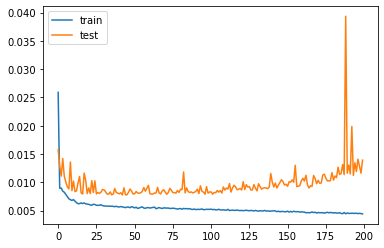

In [9]:
history = model.fit(xt, yt,validation_data=(xv, yv),epochs=200,batch_size = batch)
# demonstrate prediction


pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()




In [10]:
def ForecastingValue(StartIndex,EndIndex): 
    
    xforecast = ArrayForForecast(DataForLSTM).iloc[StartIndex:EndIndex,0:].to_numpy()
    
    xforecast = np.asarray(xforecast).astype(np.float32)
    
    scaler11 = MinMaxScaler(feature_range=(0, 1))
    scaler11 = scaler11.fit(xforecast[:,:1])
    
    normalized_values_x_forcaste = scaler11.transform(xforecast[:,:1])
    
    x_forecaste_normalize = np.concatenate((normalized_values_x_forcaste,xforecast[:,1:]),axis=1)
    
    x_forecaste_normalize = x_forecaste_normalize.reshape((1, len(x_forecaste_normalize),11))
    
    yhat = model.predict(x_forecaste_normalize, verbose=0)
    
    yhat = yhat.reshape(-1,1)
    
    z = np.zeros((1,1), dtype=int)
    
    yhat = np.append(yhat,z,axis=1)
    yhat = scaler11.inverse_transform(yhat[:,0:1]) 
   
    return yhat


def ForecastingOperation(StartIndex,EndIndex):
    forecasted_value = ForecastingValue(StartIndex,EndIndex)
    forecast = forecasted_value + DataForLSTM['Sale'][EndIndex - 1]
    return forecast
    


In [11]:
Aug2018Complete = pd.read_csv("../input/aug2018/Aug-2018.csv")
Aug2018Complete = Aug2018Complete.dropna()
Aug2018Complete = Aug2018Complete.rename(columns = {'twitter-sentiment':'twitter','date':'Date'})
Aug2018Complete = Aug2018Complete.rename(columns = {'FDI-Growth-Rate':'FDI-Growth','date':'Date'})
Aug2018Complete = Aug2018Complete.rename(columns = {'GDP-Growth-Rate':'GDP-Growth','date':'Date'})
Aug2018Complete = Aug2018Complete.rename(columns = {'unemployment-rate':'Unemployment-Rate','date':'Date'})
Aug2018Complete = Aug2018Complete.rename(columns = {'foreign-exchange':'forex','date':'Date'})
Aug2018Complete['Date'] = Aug2018Complete['Date'].astype('datetime64[D]')
Aug2018Complete = Aug2018Complete.reset_index()
del Aug2018Complete['index']
del Aug2018Complete['Unnamed: 0']
TestingFrame = pd.concat([TestingFrame,Aug2018Complete])
del TestingFrame['Year-Month']
del TestingFrame['Year']
TestingFrame.isnull().sum()




Date                  0
Sale                 22
BSE_Close             0
FDI-Inward            0
IIP                   0
forex                 0
Real-GDP              0
twitter               0
Unemployment-Rate     0
Inflation-Rate        0
GDP-Growth            0
FDI-Growth            0
dtype: int64

In [12]:
ForecastDataFrame = pd.DataFrame(data = Aug2018Complete.values,columns=Aug2018Complete.columns) 
ForecastDataFrame = ForecastDataFrame.rename(columns = {'sentiment':'twitter'})
ScaledDataForForecast = scaling(ForecastDataFrame)
#ScaledDataForForecast = ScaledDataForForecast.reshape(22,10,1)
ScaledDataForForecast = np.asarray(ScaledDataForForecast)
ScaledDataForForecast = np.asarray(ScaledDataForForecast).astype(np.float32)



In [13]:
DataAug = pd.DataFrame(data=ScaledDataForForecast,columns=['BSE_Close','FDI_Inward','IIP','forex','Real_GDP','twitter','UR','Inflation_Rate','GDP_Growth','FDI_Growth'])

In [14]:
ForecastingFrame = pd.DataFrame(data=DataAug,columns=['BSE_Close','FDI_Inward','IIP','forex','Real_GDP','twitter','UR','Inflation_Rate','GDP_Growth','FDI_Growth'])
ForecastingFrame['Date'] = Aug2018Complete['Date'].values
ForecastingFrame = pd.concat([DataForLSTM.iloc[2332:,:],ForecastingFrame])
ForecastingFrame = ForecastingFrame.reset_index()
del ForecastingFrame['index']
#ForecastingFrame
ForecastingFrame

,Date,BSE_Close,FDI_Inward,IIP,forex,Real_GDP,twitter,UR,Inflation_Rate,GDP_Growth,FDI_Growth,Sale
0,2018-07-20,0.965977,0.885593,1,0.989247,0.45,0.121449,0.0533,0.0561403,0.0681137,0.01,8.91364e+10
1,2018-07-23,0.973553,0.885593,1,0.99323,0.45,0.144819,0.0533,0.0561403,0.0681137,0.01,8.47052e+10
2,2018-07-24,0.977183,0.885593,1,0.997212,0.45,0.13017,0.0533,0.0561403,0.0681137,0.01,9.68496e+10
3,2018-07-25,0.978313,0.885593,1,0.988451,0.45,0.0825655,0.0533,0.0561403,0.0681137,0.01,8.564e+10
4,2018-07-26,0.982622,0.885593,1,0.986061,0.45,0.144309,0.0533,0.0561403,0.0681137,0.01,1.60345e+11
5,2018-07-27,0.994629,0.885593,1,0.983672,0.45,0.121198,0.0533,0.0561403,0.0681137,0.01,9.0698e+10
6,2018-07-30,1,0.885593,1,0.983672,0.45,0.113977,0.0533,0.0561403,0.0681137,0.01,9.6907e+10
7,2018-07-31,0.254939,0,0,0.0646388,0,0.126104,0.0533,0.0561403,0.0681137,0.01,NaN
8,2018-08-01,0.205871,0,0,0,0,0.100176,0.0533,0.0561403,0.0681137,0.01,NaN
9,2018-08-02,0,0,0,0.0988593,0,0.06346,0.0533,0.0561403,0.0681137,0.01,NaN


In [15]:
StartIndex = 2318
EndIndex = 2338
forecasted_values = []
for i in range(22):
    ForecastingFrame['Sale'][7+i:8+i] = ForecastingOperation(StartIndex,EndIndex)
    DataForLSTM = DataForLSTM.append(ForecastingFrame[7+i:8+i],ignore_index=True)
    StartIndex = StartIndex+1
    EndIndex = EndIndex+1


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value 

In [16]:
TestingFrame['Sale'] = TestingFrame['Date'].map(DataForLSTM.set_index('Date')['Sale'])
TestingFrame

,Date,Sale,BSE_Close,FDI-Inward,IIP,forex,Real-GDP,twitter,Unemployment-Rate,Inflation-Rate,GDP-Growth,FDI-Growth
0,2009-01-01,3.34339e+09,9903.46,35582.4,80.0789,48.2825,1.5,0.0366225,5.566,10.4478,7.86188,0.2
1,2009-01-02,1.54256e+10,9958.22,35582.4,80.0789,48.25,1.5,0.0366225,5.566,10.4478,7.86188,0.2
2,2009-01-05,2.90138e+10,10275.6,35582.4,80.0789,48.5,1.5,0.0973725,5.566,10.4478,7.86188,0.2
3,2009-01-06,4.10181e+10,10335.9,35582.4,80.0788,48.5,1.5,0.0890036,5.566,10.4478,7.86188,0.2
4,2009-01-07,5.93318e+10,9586.88,35582.4,80.0788,48.56,1.5,0.0262706,5.566,10.4478,7.86188,0.2
...,...,...,...,...,...,...,...,...,...,...,...,...
17,2018-08-27,-3.73618e+12,38694.1,42117.5,114.547,70.16,7.1,0.124183,5.33,5.61403,6.81137,0.01
18,2018-08-28,1.94252e+13,38896.6,42117.5,114.547,70.09,7.1,0.104347,5.33,5.61403,6.81137,0.01
19,2018-08-29,-9.16455e+12,38722.9,42117.5,114.547,70.53,7.1,0.11366,5.33,5.61403,6.81137,0.01
20,2018-08-30,3.27604e+13,38690.1,42117.5,114.547,70.74,7.1,0.05206,5.33,5.61403,6.81137,0.01


In [17]:
sep_to_dec_2018 = pd.read_csv("../input/thesis/sep_to_dec_2018.csv",index_col=0,usecols=['TR_DATE','VALUE (in Rs)','foreign-exchange','RFDE_INSTR_TYPE','Inflation-Rate','FDI-Inward','FDI-Growth-Rate','GDP-Growth-Rate','IIP','unemployment-rate','BSE_Close','twitter-sentiment','Real-GDP'])
jan_to_jun_2019 = pd.read_csv("../input/thesis/jan_to_jun_2019.csv",index_col=0,usecols=['TR_DATE','VALUE (in Rs)','foreign-exchange','RFDE_INSTR_TYPE','Inflation-Rate','FDI-Inward','FDI-Growth-Rate','GDP-Growth-Rate','IIP','unemployment-rate','BSE_Close','twitter-sentiment','Real-GDP'])
jul_to_dec_2019 = pd.read_csv("../input/thesis/jul_to_dec_2019.csv",index_col=0,usecols=['TR_DATE','VALUE (in Rs)','foreign-exchange','RFDE_INSTR_TYPE','Inflation-Rate','FDI-Inward','FDI-Growth-Rate','GDP-Growth-Rate','IIP','unemployment-rate','BSE_Close','twitter-sentiment','Real-GDP'])
#ALL Files are concatenated together 

df_2 = pd.concat([sep_to_dec_2018,jan_to_jun_2019,jul_to_dec_2019])


#Instrument type Equity is selected.

df_2 = df_2.loc[df_2['RFDE_INSTR_TYPE'] == 'REG_DL_INSTR_EQ']

df_2 =df_2.reset_index()
#Renaming of the column 

df_2 = df_2.rename(columns={'VALUE (in Rs)': 'Sale'})

#Converting the TR_DATE columns which denotes the transaction date into date time formate. 

df_2['TR_DATE'] = df_2['TR_DATE'].astype('datetime64[D]')

TestingFrame2 = DataFrameCreation(df_2)
TestingFrame2 = TestingFrame2.dropna()

NewDataFrame1 = pd.concat([TestingFrame,TestingFrame2])


NewDataFrame1 = NewDataFrame1.reset_index()
del NewDataFrame1['index']

Outliers2 = Outlier(NewDataFrame1)
NewDataFrame1.drop(NewDataFrame1.index[Outliers2],inplace=True)
NewDataFrame1.shape
NewDataFrame1 = NewDataFrame1.reset_index()
del NewDataFrame1['index']
NewDataFrame1.shape

NewDataFrame1['Sale'] = NewDataFrame1['Sale'].astype('float64')


In [18]:
ScaledDataForForecast_1 = scaling(NewDataFrame1)

In [19]:
NewDataForLSTM = pd.DataFrame(data=ScaledDataForForecast_1,columns=['BSE_Close','FDI_Inward','IIP','forex','Real_GDP','twitter','UR','Inflation_Rate','GDP_Growth','FDI_Growth'])
NewDataForLSTM['Date'] = NewDataFrame1['Date'].values
NewDataForLSTM['Sale'] = NewDataFrame1['Sale'].values
NewDataForLSTM = NewDataForLSTM[['Date','BSE_Close','FDI_Inward','IIP','forex','Real_GDP','twitter','UR','Inflation_Rate','GDP_Growth','FDI_Growth','Sale']]
NewDataForLSTM


,Date,BSE_Close,FDI_Inward,IIP,forex,Real_GDP,twitter,UR,Inflation_Rate,GDP_Growth,FDI_Growth,Sale
0,2009-01-01,0.0519988,0.319005,1.75859e-13,0.144019,0.766667,0.0366225,0.05566,0.104478,0.0786188,0.2,3.343394e+09
1,2009-01-02,0.0536324,0.319005,2.22489e-13,0.142951,0.766667,0.0366225,0.05566,0.104478,0.0786188,0.2,1.542561e+10
2,2009-01-05,0.0631005,0.319005,1.76748e-13,0.151167,0.766667,0.0973725,0.05566,0.104478,0.0786188,0.2,2.901384e+10
3,2009-01-06,0.0649002,0.319005,1.10578e-13,0.151167,0.766667,0.0890036,0.05566,0.104478,0.0786188,0.2,4.101809e+10
4,2009-01-07,0.0425546,0.319005,3.24185e-14,0.153138,0.766667,0.0262706,0.05566,0.104478,0.0786188,0.2,5.933185e+10
...,...,...,...,...,...,...,...,...,...,...,...,...
2672,2019-12-24,0.993429,1,1,0.898127,0.466667,0.057151,0.05355,0.0963455,0.0575993,0.02,3.745985e+10
2673,2019-12-26,0.984554,1,1,0.89977,0.466667,0.057151,0.05355,0.0963455,0.0575993,0.02,8.758545e+10
2674,2019-12-27,0.996826,1,1,0.905357,0.466667,0.057151,0.05355,0.0963455,0.0575993,0.02,5.084599e+10
2675,2019-12-30,0.996315,1,1,0.900427,0.466667,0.057151,0.05355,0.0963455,0.0575993,0.02,5.077388e+10


In [24]:
len(Outliers2)

8

In [20]:
TempFrame = pd.DataFrame()
TempFrame['Date'] = NewDataForLSTM['Date'].values
TempFrame['Sale'] = NewDataForLSTM['Sale'].values
TempFrame['BSE_Close'] = NewDataForLSTM['BSE_Close'].values
TempFrame['FDI_Inward'] = NewDataForLSTM['FDI_Inward'].values
TempFrame['IIP'] = NewDataForLSTM['IIP'].values
TempFrame['forex'] = NewDataForLSTM['forex'].values
TempFrame['Real_GDP'] = NewDataForLSTM['Real_GDP'].values
TempFrame['twitter'] = NewDataForLSTM['twitter'].values
TempFrame['UR'] = NewDataForLSTM['UR'].values
TempFrame['Inflation_Rate'] = NewDataForLSTM['Inflation_Rate'].values
TempFrame['GDP_Growth'] = NewDataForLSTM['GDP_Growth'].values
TempFrame['FDI_Growth'] = NewDataForLSTM['FDI_Growth'].values

TempFrame['diff-sale'] = TempFrame['Sale'].diff(1)

TempFrame = TempFrame.dropna()

TempFrame = TempFrame.reset_index()

del TempFrame['index']
del TempFrame['Sale']
    
TempFrame = TempFrame[['Date','diff-sale','BSE_Close','FDI_Inward','IIP','forex','Real_GDP','twitter','UR','Inflation_Rate','GDP_Growth','FDI_Growth']]


In [26]:
TempFrame.iloc[2635:2655,:].shape

(20, 12)

In [27]:
from keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping
import math
array_test_forecast_1 = ArrayForForecast(NewDataForLSTM).iloc[:2635,0:].to_numpy()

array_test_forecast_1 = np.asarray(array_test_forecast_1).astype(np.float32)

scaler10 = MinMaxScaler(feature_range=(0, 1))
scaler10 = scaler10.fit(array_test_forecast_1[:,:1])
normalized_values_1 = scaler10.transform(array_test_forecast_1[:,:1])
normalized_values_forecast_1 = np.concatenate((normalized_values_1,array_test_forecast_1[:,1:]),axis=1)

In [28]:

xForTesting_1, yForTesting_1 = split_sequences(normalized_values_forecast_1,21)

xt_1 = xForTesting[:2400,:,:]
yt_1 = yForTesting[:2400]
xv_1 = xForTesting[2400:,:,:]
yv_1 = yForTesting[2400:]

n_features = xForTesting.shape[2]

batch = 10

model_final = Sequential()
model_final.add(LSTM(50, activation='relu', input_shape=(20, n_features)))
model_final.add(Dense(1))
model_final.compile(optimizer='adam', loss='mse')
print(model_final.summary())
# fit model


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 50)                12400     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 12,451
Trainable params: 12,451
Non-trainable params: 0
_________________________________________________________________
None


Epoch 1/200
210/210 [==============================] - 2s 8ms/step - loss: 0.0172 - val_loss: 0.0119
Epoch 2/200
210/210 [==============================] - 2s 8ms/step - loss: 0.0091 - val_loss: 0.0115
Epoch 3/200
210/210 [==============================] - 2s 8ms/step - loss: 0.0088 - val_loss: 0.0118
Epoch 4/200
210/210 [==============================] - 2s 7ms/step - loss: 0.0087 - val_loss: 0.0152
Epoch 5/200
210/210 [==============================] - 2s 8ms/step - loss: 0.0085 - val_loss: 0.0107
Epoch 6/200
210/210 [==============================] - 2s 8ms/step - loss: 0.0082 - val_loss: 0.0114
Epoch 7/200
210/210 [==============================] - 2s 8ms/step - loss: 0.0079 - val_loss: 0.0098
Epoch 8/200
210/210 [==============================] - 2s 8ms/step - loss: 0.0074 - val_loss: 0.0096
Epoch 9/200
210/210 [==============================] - 2s 8ms/step - loss: 0.0070 - val_loss: 0.0109
Epoch 10/200
210/210 [==============================] - 2s 8ms/step - loss: 0.0068 - val_lo

210/210 [==============================] - 2s 9ms/step - loss: 0.0054 - val_loss: 0.0086
Epoch 82/200
210/210 [==============================] - 2s 8ms/step - loss: 0.0053 - val_loss: 0.0093
Epoch 83/200
210/210 [==============================] - 2s 7ms/step - loss: 0.0052 - val_loss: 0.0083
Epoch 84/200
210/210 [==============================] - 2s 8ms/step - loss: 0.0052 - val_loss: 0.0085
Epoch 85/200
210/210 [==============================] - 2s 8ms/step - loss: 0.0053 - val_loss: 0.0086
Epoch 86/200
210/210 [==============================] - 2s 8ms/step - loss: 0.0053 - val_loss: 0.0084
Epoch 87/200
210/210 [==============================] - 2s 8ms/step - loss: 0.0053 - val_loss: 0.0086
Epoch 88/200
210/210 [==============================] - 2s 8ms/step - loss: 0.0054 - val_loss: 0.0085
Epoch 89/200
210/210 [==============================] - 2s 8ms/step - loss: 0.0052 - val_loss: 0.0085
Epoch 90/200
210/210 [==============================] - 2s 8ms/step - loss: 0.0053 - val_loss: 

Epoch 161/200
210/210 [==============================] - 2s 8ms/step - loss: 0.0050 - val_loss: 0.0091
Epoch 162/200
210/210 [==============================] - 2s 8ms/step - loss: 0.0050 - val_loss: 0.0088
Epoch 163/200
210/210 [==============================] - 2s 8ms/step - loss: 0.0050 - val_loss: 0.0091
Epoch 164/200
210/210 [==============================] - 2s 8ms/step - loss: 0.0049 - val_loss: 0.0106
Epoch 165/200
210/210 [==============================] - 2s 8ms/step - loss: 0.0051 - val_loss: 0.0112
Epoch 166/200
210/210 [==============================] - 2s 8ms/step - loss: 0.0050 - val_loss: 0.0094
Epoch 167/200
210/210 [==============================] - 2s 8ms/step - loss: 0.0050 - val_loss: 0.0093
Epoch 168/200
210/210 [==============================] - 2s 9ms/step - loss: 0.0049 - val_loss: 0.0101
Epoch 169/200
210/210 [==============================] - 2s 8ms/step - loss: 0.0050 - val_loss: 0.0087
Epoch 170/200
210/210 [==============================] - 2s 8ms/step - lo

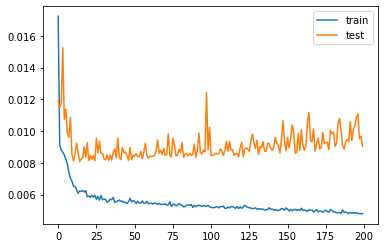

In [29]:
history = model_final.fit(xt, yt,validation_data=(xv, yv),epochs=200,batch_size = batch)
# demonstrate prediction


pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()




In [30]:

def ForecastingValue_final(StartIndex,EndIndex): 
    
    xforecast = ArrayForForecast(NewDataForLSTM).iloc[StartIndex:EndIndex,0:].to_numpy()
    
    xforecast = np.asarray(xforecast).astype(np.float32)
    
    scaler11 = MinMaxScaler(feature_range=(0, 1))
    scaler11 = scaler11.fit(xforecast[:,:1])
    
    normalized_values_x_forcaste = scaler11.transform(xforecast[:,:1])
    
    x_forecaste_normalize = np.concatenate((normalized_values_x_forcaste,xforecast[:,1:]),axis=1)
    
    x_forecaste_normalize = x_forecaste_normalize.reshape((1, len(x_forecaste_normalize),11))
    
    yhat = model_final.predict(x_forecaste_normalize, verbose=0)
    
    yhat = yhat.reshape(-1,1)
    
    
    #z = np.zeros((1,1), dtype=int)
    
    #yhat = np.append(yhat,z,axis=1)
    yhat = scaler11.inverse_transform(yhat[:,0:1]) 
   
    return yhat


def ForecastingOperation_final(StartIndex,EndIndex):
    forecasted_value = ForecastingValue_final(StartIndex,EndIndex)
    forecast = forecasted_value + NewDataForLSTM['Sale'][EndIndex - 1]
    return forecast
    



In [31]:
StartIndex = 2635
EndIndex = 2655
forecasted_values = []
for i in range(21):
    forecasted = ForecastingOperation_final(StartIndex,EndIndex)
    print(forecasted)
    forecasted_values.append(forecasted)
    StartIndex = StartIndex+1
    EndIndex = EndIndex+1


[[9.4305616e+10]]
[[1.5711109e+09]]
[[9.9151266e+10]]
[[9.802792e+10]]
[[1.8704266e+11]]
[[1.9301066e+11]]
[[1.7877133e+11]]
[[2.1183136e+11]]
[[2.154764e+11]]
[[2.3273057e+11]]
[[2.3709816e+11]]
[[2.3292985e+11]]
[[2.2388053e+11]]
[[2.7607263e+11]]
[[2.8880152e+11]]
[[2.1720093e+11]]
[[4.184193e+11]]
[[-4.4057172e+11]]
[[3.2297562e+10]]
[[9.348467e+10]]
[[6.23759e+10]]


In [32]:
NewDataForLSTM.iloc[2632:,:]

,Date,BSE_Close,FDI_Inward,IIP,forex,Real_GDP,twitter,UR,Inflation_Rate,GDP_Growth,FDI_Growth,Sale
2632,2019-10-27,0.927468,1,1,0.886034,0.466667,0.170973,0.05355,0.0761589,0.0575993,0.02,5.424497e+08
2633,2019-10-29,0.94482,1,1,0.885968,0.466667,0.0980183,0.05355,0.0761589,0.0575993,0.02,1.362760e+11
2634,2019-10-30,0.951384,1,1,0.889254,0.466667,0.0814327,0.05355,0.0761589,0.0575993,0.02,1.662064e+11
2635,2019-10-31,0.953686,1,1,0.890897,0.466667,0.105049,0.05355,0.0761589,0.0575993,0.02,1.881624e+11
2636,2019-11-01,0.95476,1,1,0.882682,0.466667,0.0324074,0.05355,0.0860927,0.0575993,0.02,1.099830e+11
2637,2019-11-04,0.958844,1,1,0.883667,0.466667,0.155357,0.05355,0.0860927,0.0575993,0.02,9.009675e+10
2638,2019-11-05,0.957242,1,1,0.884325,0.466667,0.0895723,0.05355,0.0860927,0.0575993,0.02,1.015518e+11
2639,2019-11-06,0.963851,1,1,0.889254,0.466667,0.091078,0.05355,0.0860927,0.0575993,0.02,1.039077e+11
2640,2019-11-07,0.969339,1,1,0.891883,0.466667,0.0785956,0.05355,0.0860927,0.0575993,0.02,1.150210e+11
2641,2019-11-08,0.95949,1,1,0.90207,0.466667,0.0788406,0.05355,0.0860927,0.0575993,0.02,1.480831e+11


In [35]:
NewDataForLSTM.iloc[2656:,:]

,Date,BSE_Close,FDI_Inward,IIP,forex,Real_GDP,twitter,UR,Inflation_Rate,GDP_Growth,FDI_Growth,Sale
2656,2019-12-02,0.973767,1,1,0.911929,0.466667,0.057151,0.05355,0.0963455,0.0575993,0.02,1.466630e+11
2657,2019-12-03,0.969986,1,1,0.913572,0.466667,0.057151,0.05355,0.0963455,0.0575993,0.02,9.453688e+10
2658,2019-12-04,0.975202,1,1,0.906014,0.466667,0.057151,0.05355,0.0963455,0.0575993,0.02,1.098092e+11
2659,2019-12-05,0.973093,1,1,0.899113,0.466667,0.057151,0.05355,0.0963455,0.0575993,0.02,8.550971e+10
2660,2019-12-06,0.963116,1,1,0.899113,0.466667,0.057151,0.05355,0.0963455,0.0575993,0.02,7.864983e+10
2661,2019-12-09,0.964377,1,1,0.891226,0.466667,0.057151,0.05355,0.0963455,0.0575993,0.02,7.625785e+10
2662,2019-12-10,0.956993,1,1,0.885311,0.466667,0.057151,0.05355,0.0963455,0.0575993,0.02,8.390286e+10
2663,2019-12-11,0.962144,1,1,0.881696,0.466667,0.057151,0.05355,0.0963455,0.0575993,0.02,9.125146e+10
2664,2019-12-12,0.96719,1,1,0.878081,0.466667,0.057151,0.05355,0.0963455,0.0575993,0.02,9.058205e+10
2665,2019-12-13,0.979958,1,1,0.883996,0.466667,0.057151,0.05355,0.0963455,0.0575993,0.02,8.782259e+10


In [36]:
myarray = np.asarray(forecasted_values)
myarray = myarray.reshape(21,1) 

x = NewDataForLSTM.iloc[2656:,:]
x['forecasted'] = myarray
x['forecasted'] = x['forecasted'].astype('float64')



/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


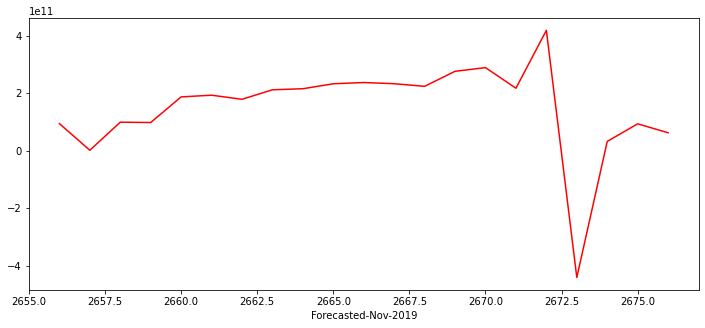

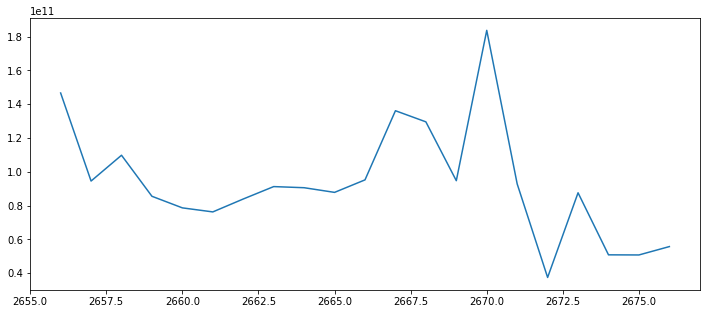

In [37]:
plt.figure(figsize=(12,5))
x['forecasted'].plot( color='red')

plt.xlabel("Real-Nov-2019")
plt.xlabel("Forecasted-Nov-2019")
plt.figure(figsize=(12,5))

x['Sale'].plot()


In [38]:
ypred = np.asarray(forecasted_values)
ypred = ypred.reshape(-1,1)
ytrue = np.asarray(x['Sale'].values)
ytrue = ytrue.reshape(-1,1)

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

print('MAPE: %f' %mean_absolute_percentage_error(ytrue,ypred))

MAPE: 163.107336
